In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import chain
from itertools import groupby
import scipy.misc
import scipy.signal
from scipy import ndimage
import time
import os
import pickle
import cPickle
from matplotlib.colors import LogNorm
import sklearn.cluster

!jupyter nbconvert --to script cluster_sizes.ipynb
import event_converter
import cluster_sizes
reload(event_converter)
reload(cluster_sizes)
from event_converter import *
from cluster_sizes import *

print 'Done.'

[NbConvertApp] Converting notebook cluster_sizes.ipynb to script
[NbConvertApp] Writing 11519 bytes to cluster_sizes.py
[NbConvertApp] Converting notebook event_converter.ipynb to script
[NbConvertApp] Writing 2675 bytes to event_converter.py


<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook event_converter.ipynb to script
[NbConvertApp] Writing 2675 bytes to event_converter.py


<IPython.core.display.Javascript object>

Done.


In [3]:
def cl_tots_path_and_filename(eta, phi):
    return ('data/cluster_tots/' + str(eta) + '/', str(phi) + '.dat')

def load_cluster_tots(eta, phi):
    path, filename = cl_tots_path_and_filename(eta, phi)
    
    cluster_tots = {}
    hits = get_hits(eta, phi)
    for eventID, positions in cl_positions.iteritems():
        cluster_tots_arr = []
        tot = get_tot_image(hits, eventID)
        for (x1, y1, x2, y2) in positions:
            cluster_tot = tot[x1:x2+1, y1:y2+1]
            ids = np.where(cluster_tot > 0)
            cluster_tots_arr.append(cluster_tot)
        cluster_tots[eventID] = cluster_tots_arr

    if not os.path.exists(path):
        os.makedirs(path)
    outfile = open(path + filename, 'wb')
    cPickle.dump(cluster_tots, outfile, protocol=pickle.HIGHEST_PROTOCOL)
    outfile.close()
    return cluster_tots

def get_cluster_tots(eta, phi):
    path, filename = cl_tots_path_and_filename(eta, phi)
    if not os.path.exists(path + filename):
        return load_cluster_tots(eta, phi)
    else:
        infile = open(path + filename, 'r')
        data = cPickle.load(infile)
        infile.close
        return data 
    
def make_line_prediction(shape, y0, y1):
    num = shape[1]
    x, y = np.linspace(0, shape[1]-1, num), np.linspace(y0, y1, num)

    prediction = np.zeros(cluster_tot.shape)
    for i in range(num):
        prediction[int(floor(y[i])), int(x[i])] = ceil(y[i]+0.00001) - y[i]
        prediction[int(ceil(y[i])), int(x[i])] = y[i] - floor(y[i]-0.00001)
    return prediction

eta: -30 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -29 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -28 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -27 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -26 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -25 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -24 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -23 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -22 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -21 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -20 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -19 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -18 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -17 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -16 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -15 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -14 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -13 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -12 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: -11 phi

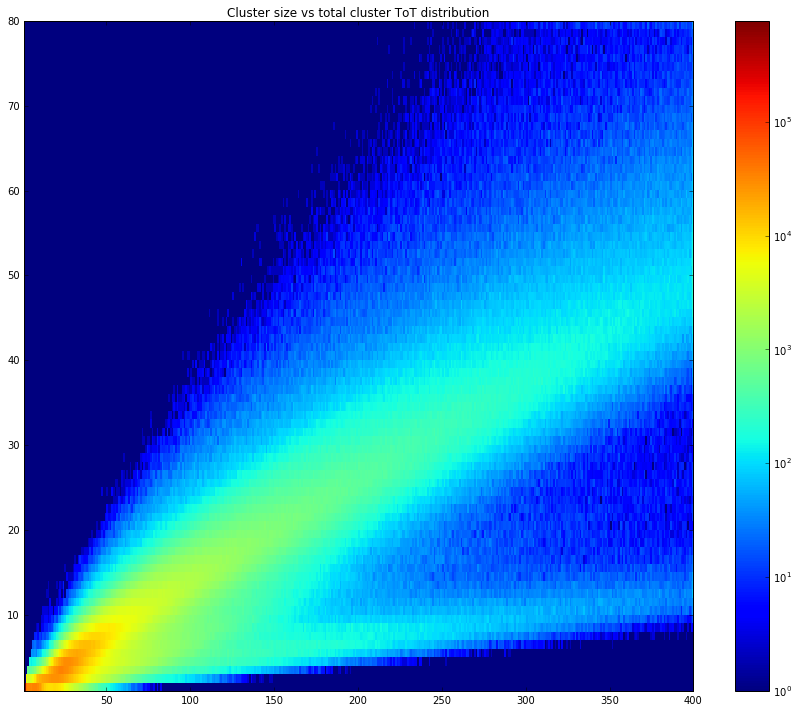

In [28]:
tot_size = []

found_event = 0

for eta_i in range(-30, 31):
    print 'eta:', eta_i, 'phi:', 
    for phi_i in range(0, 16):
        print phi_i,
        cl_positions = cluster_positions(eta_i, phi_i)
        cluster_tots = get_cluster_tots(eta_i, phi_i)
        for eventID, positions in cl_positions.iteritems():
            for (i, (x1, y1, x2, y2)) in enumerate(positions):
                cluster_tot = cluster_tots[eventID][i]
                total_tot = np.sum(cluster_tot)
                num_hits = len(np.where(cluster_tot > 0)[0])
                tot_size.append((num_hits, total_tot))
    print
    
tot_size = np.array(tot_size)

plt.figure(figsize=(15, 12))
plt.title('Cluster size vs total cluster ToT distribution')
H, yedges, xedges = np.histogram2d(tot_size[:, 0], tot_size[:, 1], bins=(range(1, 81), range(1, 401)))
norm = LogNorm(1, H.max())
plt.imshow(np.clip(H, 1, H.max()), norm=norm, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.axis('tight')
plt.savefig('cluster_size_vs_tot.png')

# Find an event from the lower tail

eta: 1 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 2 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 3 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 4 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 5 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 6 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 7 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 8 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 9 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 10 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 11 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 12 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 13 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 14 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 15 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 16 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 17 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 18 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 19 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 20 phi: 0 1 2 3 4 5 6 7 8 9 10 11 1

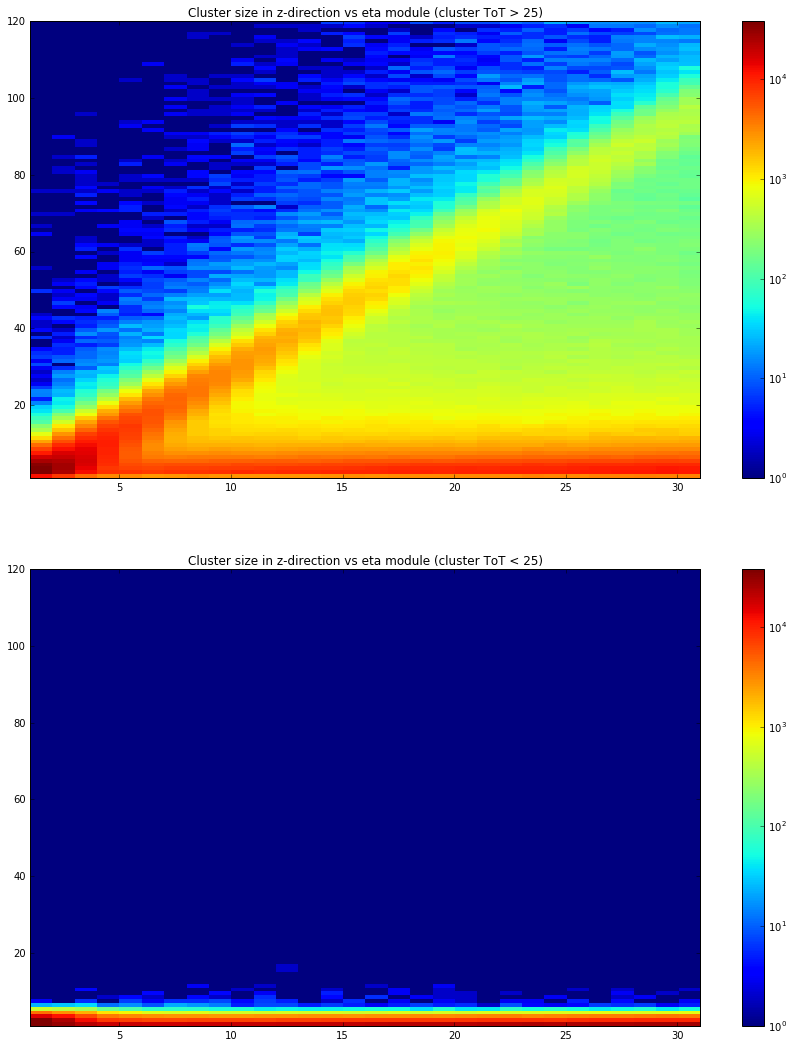

In [129]:
def cluster_sizes_for_eta_with_filter(eta, min=0, max=9e99):
    print 'eta:', eta, 'phi:',
    sizes = np.zeros((0,2))
    sizes2 = np.zeros((0,2))
    for phi_i in range(0, 16):
        print phi_i,
        cl_positions = cluster_positions(eta, phi_i)
        cluster_tots = get_cluster_tots(eta, phi_i)
        for eventID, positions in cl_positions.iteritems():
            tots = np.array([np.sum(cluster_tots[eventID][i]) for (i, _) in enumerate(positions)])
            sz = cluster_sizes(positions[np.where((tots > min) & (tots <= max))[0], :])
            sz2 = cluster_sizes(positions[np.where((tots <= min) | (tots > max))[0], :])
            sizes = np.vstack([sizes, sz])
            sizes2 = np.vstack([sizes2, sz2])
    print
    return (sizes, sizes2)

def show_length_heatmap_per_eta(eta1, eta2, filter):
    plt.figure(figsize=(15, 18))
    
    eta_lengths = []
    eta_lengths2 = []
    for eta_i in range(eta1, eta2+1):
        sizes, sizes2 = cluster_sizes_for_eta_with_filter(eta_i, min=filter)
        sizes[:, 0] = eta_i
        sizes2[:, 0] = eta_i
        eta_lengths.append(sizes)
        eta_lengths2.append(sizes2)

    eta_lengths = np.vstack(eta_lengths)
    eta_lengths2 = np.vstack(eta_lengths2)
    
    plt.subplot(2, 1, 1)
    plt.title('Cluster size in z-direction vs eta module (cluster ToT > ' + str(filter) + ')')
    H, yedges, xedges = np.histogram2d(eta_lengths[:, 1], eta_lengths[:, 0], bins=(range(1, 121), range(1, 32)))
    norm = LogNorm(1, H.max())
    plt.imshow(np.clip(H, 1, H.max()), norm=norm, aspect=0.25, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.colorbar()
    plt.axis('tight')

    plt.subplot(2, 1, 2)
    plt.title('Cluster size in z-direction vs eta module (cluster ToT < ' + str(filter) + ')')
    H, yedges, xedges = np.histogram2d(eta_lengths2[:, 1], eta_lengths2[:, 0], bins=(range(1, 121), range(1, 32)))
    norm = LogNorm(1, H.max())
    plt.imshow(np.clip(H, 1, H.max()), norm=norm, aspect=0.25, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.colorbar()
    plt.axis('tight')

    plt.savefig('cluster_length_eta_tot_split_' + str(filter) + '.png')

show_length_heatmap_per_eta(1, 30, 25)

In [50]:
maxes = []
for eta_i in range(1, 31):
    print 'eta:', eta_i, 'phi:', 
    for phi_i in range(0, 16):
        print phi_i,
        hits = get_hits(eta_i, phi_i)
        events = list(np.unique(hits[2,:]))
        for eventID in events:
            tot = get_tot_image(hits, eventID)
            max_tot = np.max(tot)
            maxes.append(max_tot)
    print
        
print np.mean(maxes), np.std(maxes), np.max(maxes)

eta: 1 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 2 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 3 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 4 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 5 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 6 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 7 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 8 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 9 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 10 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 11 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 12 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 13 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 14 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 15 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 16 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 17 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 18 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 19 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 20 phi: 0 1 2 3 4 5 6 7 8 9 10 11 1

In [31]:
eta = 25

tots = []

for phi_i in range(0, 16):
    print phi_i,
    cluster_tots = get_cluster_tots(eta, phi_i)
    
    total_tots = np.zeros((10,10))
    for eventID, clusters in cluster_tots.iteritems():
        for cluster_tot in clusters:
            tot_resized = scipy.misc.imresize(cluster_tot, (10, 10), interp='bilinear')
            tots.append(tot_resized)
print


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


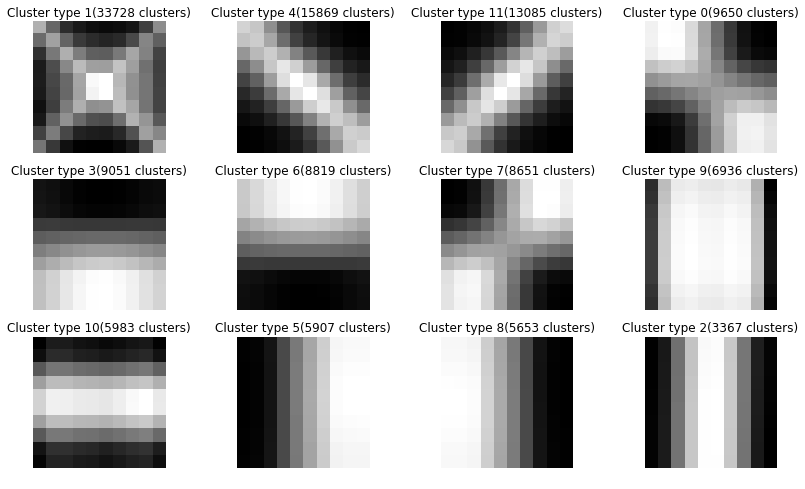

In [68]:
tots_X = np.array(tots).reshape((len(tots), 100))

N = 12

kmeans = sklearn.cluster.KMeans(n_clusters=N, random_state=123).fit(tots_X)
pred_y = kmeans.predict(tots_X)
group_definitions = dict()

plt.figure(figsize=(14,8))

indexes = range(N)
indexes.sort(key=lambda i:-len(np.where(pred_y == i)[0]))
for (j,i) in enumerate(indexes):
    group = np.array(tots)[np.where(pred_y == i), :, :][0]
    title='Cluster type ' + str(i) + '(' + str(group.shape[0]) + ' clusters)'
    plt.subplot(N/4, 4, j+1)
    group_definitions[i] = np.sum(group, axis=0)
    plt.imshow(group_definitions[i], cmap="gray", interpolation="nearest")
    plt.axis("off")
    plt.title(title)
    
plt.savefig('tot_eta_clustering_'+str(eta)+'.png')

In [74]:
n = 0
eta = 25

bins = np.array(range(-128,128))
tot_hist = np.zeros((255))
pred_hist = np.zeros((255))

for phi_i in range(0, 16):
    print phi_i,
    cluster_tots = get_cluster_tots(eta, phi_i)
    
    for eventID, clusters in cluster_tots.iteritems():
        for cluster_tot in clusters:
            #cluster_tot = 128.0*cluster_tot/np.sum(cluster_tot)
            cluster_square = scipy.misc.imresize(cluster_tot, (10, 10), interp='bilinear')
            definition = group_definitions[kmeans.predict(cluster_square.reshape((1, 100)))[0]]
            prediction = scipy.misc.imresize(definition, cluster_tot.shape, interp='bilinear')
            #prediction = 128.0*prediction/np.sum(prediction)
            prediction = 1.0*prediction/np.max(prediction)*np.max(cluster_tot)
            
            hist, _ = np.histogram(cluster_tot, bins)
            tot_hist += hist
            hist, _ = np.histogram(cluster_tot - prediction, bins)
            pred_hist += hist
            
            n += 1
            
print

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


(-25, 25)

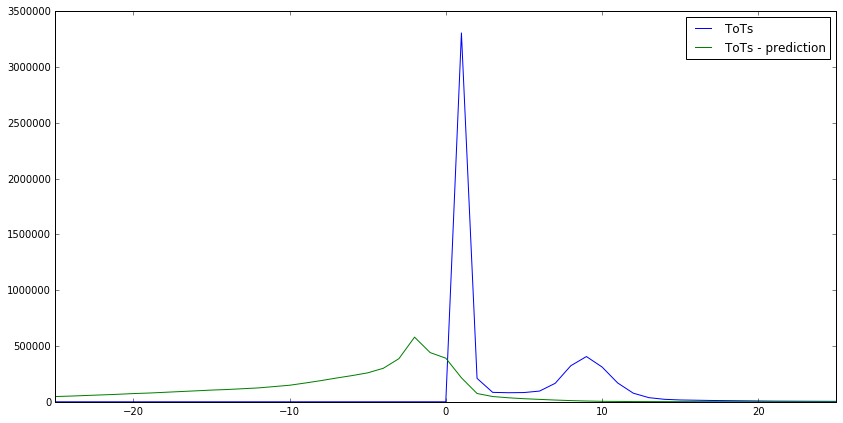

In [75]:
plt.figure(figsize=(14,7))

bins = range(-127,128)
plt.plot(bins, tot_hist, label='ToTs')
plt.plot(bins, pred_hist, label='ToTs - prediction')
plt.legend()
plt.xlim([-25, 25])

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


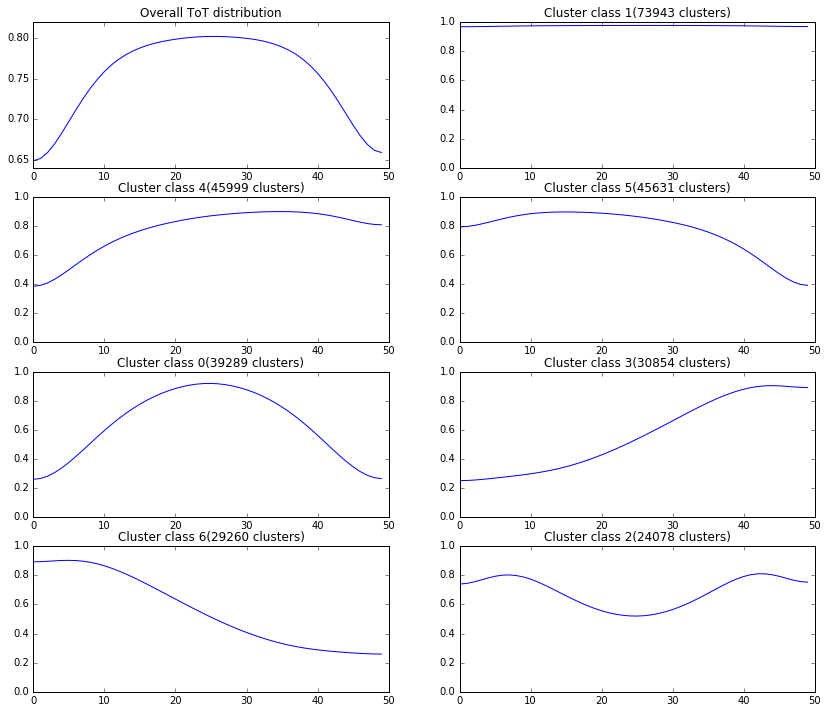

In [139]:
eta = 1
tot_lines = []

for phi_i in range(0,16):
    print phi_i,
    for eventID, clusters in get_cluster_tots(eta, phi_i).iteritems():
        for cluster in clusters:
            left_max = np.argmax(cluster, axis=0)[0]
            right_max = np.argmax(cluster, axis=0)[-1]

            x0, y0 = 0, left_max
            x1, y1 = cluster.shape[1]-1, right_max

            num = 50
            x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
            zi = scipy.ndimage.map_coordinates(cluster, np.vstack((y,x)), order=3, mode='constant')
            zi = zi / np.max(zi)
            tot_lines.append(zi)
print

N = 7
line_kmeans = sklearn.cluster.KMeans(n_clusters=N, random_state=234).fit(tot_lines)
line_preds = line_kmeans.predict(tot_lines)
group_line_definitions = {}

plt.figure(figsize=(14,12))
plt.subplot((N+1)/2, 2, 1)
plt.plot(np.vstack(tot_lines).mean(axis=0))
plt.title('Overall ToT distribution')
plt.ylim([0, 1])

indexes = range(N)
indexes.sort(key=lambda i:-len(np.where(line_preds == i)[0]))
for (j,i) in enumerate(indexes):
    group = np.array(tot_lines)[np.where(line_preds == i), :][0]
    title = 'Cluster class ' + str(i) + '(' + str(group.shape[0]) + ' clusters)'
    plt.subplot((N+1)/2, 2, j+2)
    group_line_definitions[i] = np.mean(group, axis=0)
    plt.plot(group_line_definitions[i])
    plt.ylim([0, 1])
    plt.title(title)
    
plt.savefig('tot_eta_line_clustering_norm_'+str(eta)+'.png')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


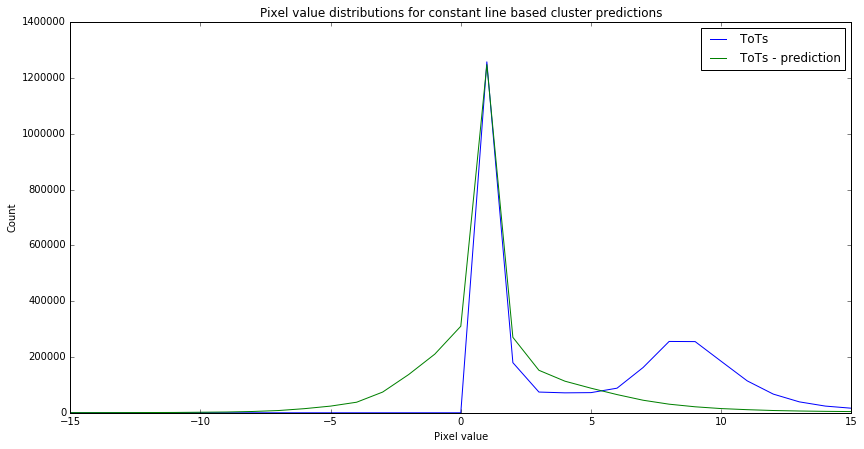

In [198]:
eta = 5

bins = np.array(range(-128,128))
tot_hist = np.zeros((255))
pred_hist = np.zeros((255))

for phi_i in range(0,16):
    print phi_i,
    for eventID, clusters in get_cluster_tots(eta, phi_i).iteritems():
        for cluster_tot in clusters:
            left_max = np.argmax(cluster_tot, axis=0)[0]
            right_max = np.argmax(cluster_tot, axis=0)[-1]
            y0 = left_max
            y1 = right_max
            num = cluster_tot.shape[1]
            x, y = np.linspace(0, cluster_tot.shape[1]-1, num), np.linspace(y0, y1, num)
            mean = cluster_tot[np.round([y,x]).astype(int).tolist()].mean()
            prediction = make_line_prediction(cluster_tot.shape, y0, y1) * mean
            
            hist, _ = np.histogram(cluster_tot, bins)
            tot_hist += hist
            hist, _ = np.histogram(cluster_tot - prediction, bins)
            pred_hist += hist            
print

plt.figure(figsize=(14,7))

bins = range(-127,128)
plt.plot(bins, tot_hist, label='ToTs')
plt.plot(bins, pred_hist, label='ToTs - prediction')
plt.legend()
plt.xlim([-15, 15])
plt.ylabel('Count')
plt.xlabel('Pixel value')
plt.title('Pixel value distributions for constant line based cluster predictions')
plt.savefig('line_prediction_distribution_' + str(eta) + '.png')

In [123]:
algs = ['base', 'cluster', 'row_cluster', 'zrle', 'line', 'lzw']

#compression_data = {}
#for alg in algs:
#    compression_data[alg] = {
#        'total_bits': np.zeros((1000)),
#        'compression_ratio_sums': np.zeros((1000)),
#        'min_bits': 10000000*np.ones((1000)),
#        'max_bits': np.zeros((1000)),
#    }
#    compression_data[alg]['bits'] = [[] for x in range(1000)]
#counts_per_length = np.zeros((1000))

def base_cluster_bit_length(cluster_tot):
    num_hits = len(np.where(cluster_tot > 0)[0])
    return num_hits * (19 + 7)

def cluster_cluster_bit_length(cluster_tot):
    length = cluster_tot.shape[1]
    height = cluster_tot.shape[0]
    return 19 + 7*length*height

def row_cluster_cluster_bit_length(cluster_tot):
    return tot_bits_row_cluster(cluster_tot)

def zrle_cluster_bit_length(cluster_tot):
    return 19 + tot_bits_zrle(cluster_tot)

def line_cluster_bit_length(cluster_tot):
    return 19 + tot_bits_line_prediction(cluster_tot)

def lzw_cluster_bit_length(cluster_tot):
    return 19 + tot_bits_lzw(cluster_tot)

for eta_i in range(23, 31):
    print 'eta:', eta_i, 'phi:',
    for phi_i in range(0,16):
        print phi_i,
        #cl_positions = cluster_positions(eta_i, phi_i)
        cluster_tots = get_cluster_tots(eta_i, phi_i)
        for eventID, clusters in cluster_tots.iteritems():
            for (i, cluster_tot) in enumerate(clusters):
                #length = cluster_tot.shape[1]
                length = min(len(np.where(cluster_tot > 0)[0]), 999)
                base_bit_length = base_cluster_bit_length(cluster_tot)
                
                for alg in algs:
                    cluster_bit_length = locals()[alg + '_cluster_bit_length'](cluster_tot)
                    compression_data[alg]['total_bits'][length] += cluster_bit_length
                    compression_data[alg]['compression_ratio_sums'][length] += 1.0 * cluster_bit_length / base_bit_length
                    compression_data[alg]['min_bits'][length] = min(cluster_bit_length, compression_data[alg]['min_bits'][length])
                    compression_data[alg]['max_bits'][length] = max(cluster_bit_length, compression_data[alg]['max_bits'][length])
                    compression_data[alg]['bits'][length].append(cluster_bit_length)

                counts_per_length[length] += 1
    print

 eta: 23 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 24 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 25 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 26 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 27 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 28 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 29 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
eta: 30 phi: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15


Overall compression ratio(base): 1.0
Overall compression ratio(cluster): 0.646917056931
Overall compression ratio(row_cluster): 0.386243680085
Overall compression ratio(zrle): 0.386107209534
Overall compression ratio(line): 0.368160270407
Overall compression ratio(lzw): 0.379836560002


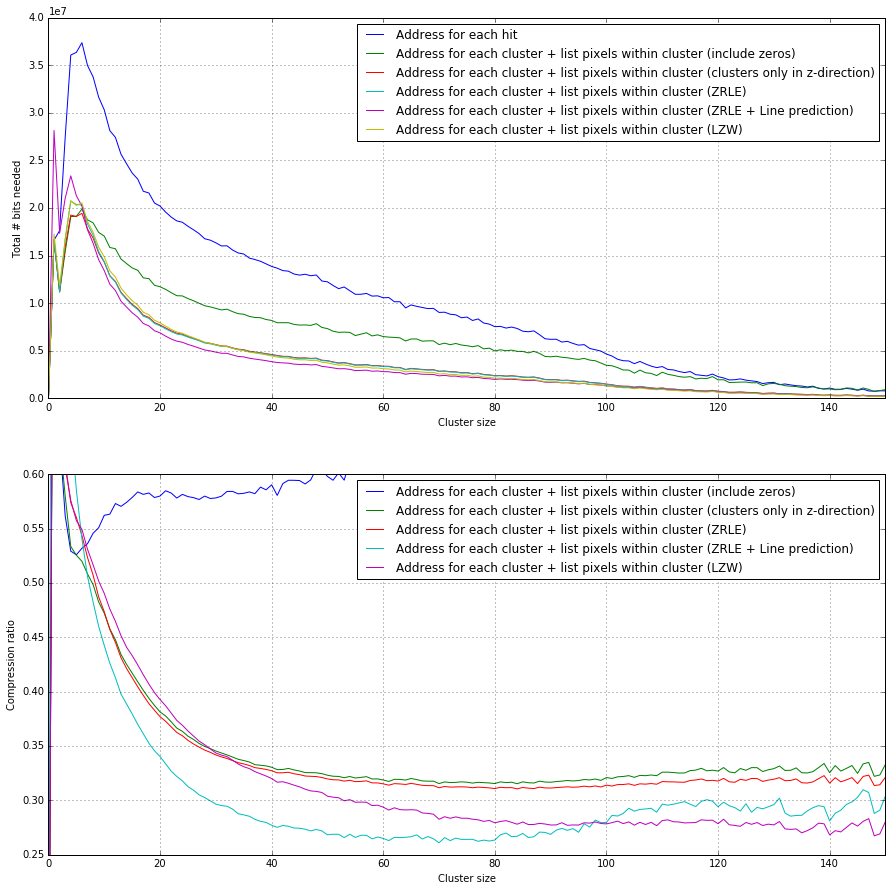

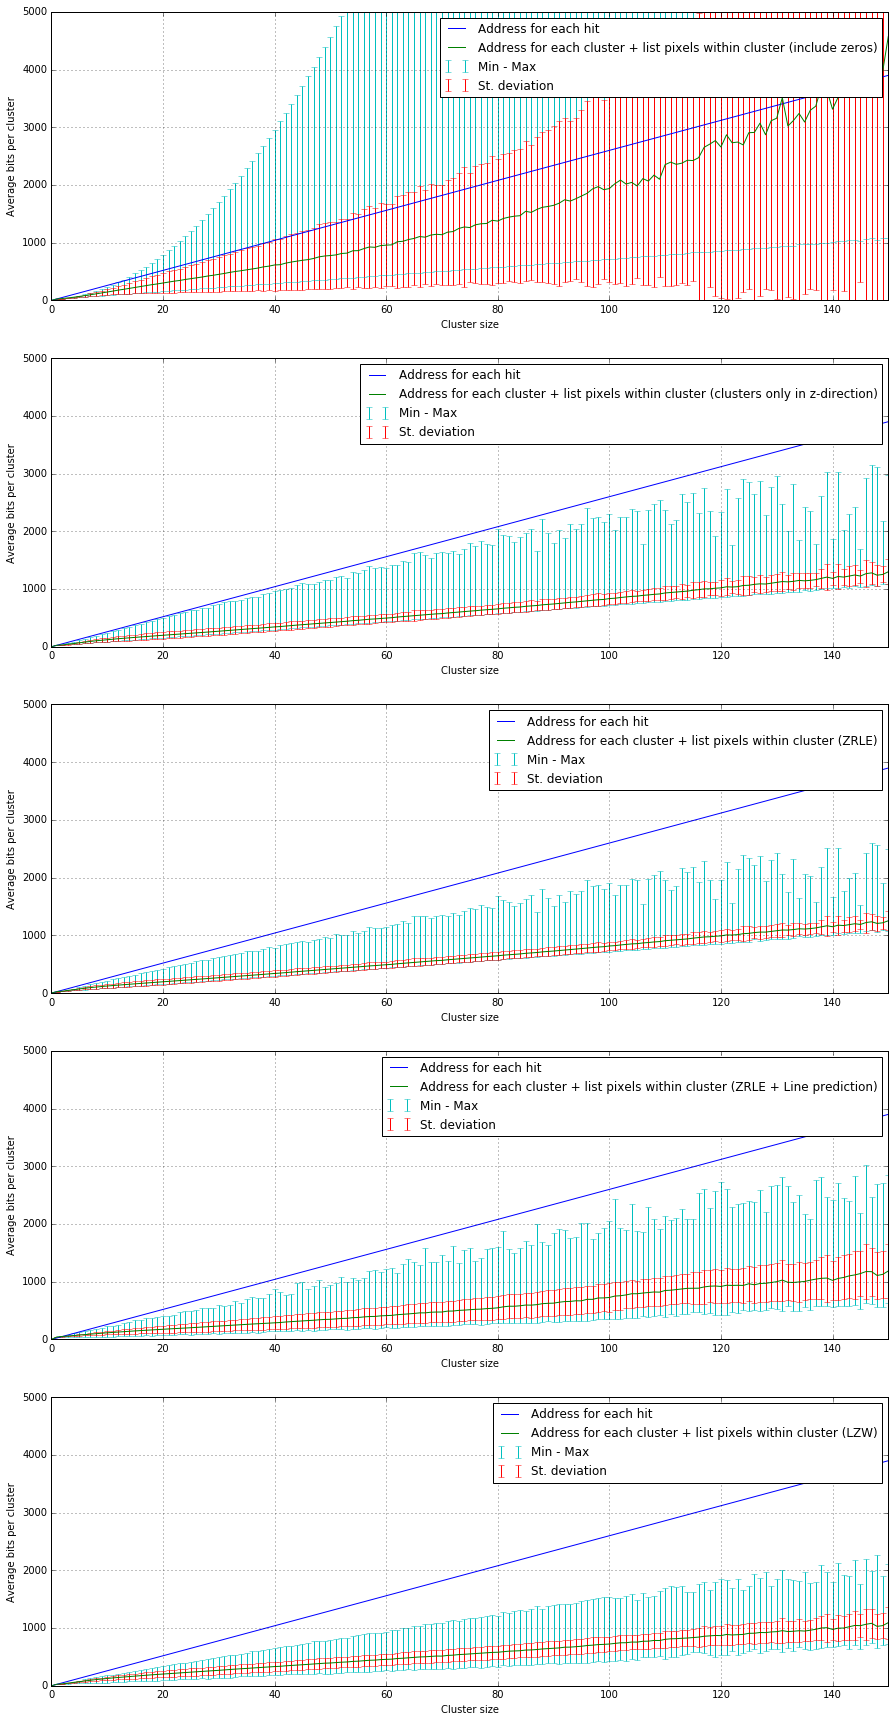

In [128]:
plt.figure(figsize=(15,15))
plt.subplot(211)

counts_per_length += 0.01

alg_labels = {
    'base': 'Address for each hit', 
    'cluster': 'Address for each cluster + list pixels within cluster (include zeros)',
    'row_cluster': 'Address for each cluster + list pixels within cluster (clusters only in z-direction)',
    'zrle': 'Address for each cluster + list pixels within cluster (ZRLE)',
    'line': 'Address for each cluster + list pixels within cluster (ZRLE + Line prediction)',
    'lzw': 'Address for each cluster + list pixels within cluster (LZW)'
}

for alg in algs:
    plt.plot( compression_data[alg]['total_bits'], label=alg_labels[alg])
    print 'Overall compression ratio(' + alg +  '):', np.sum(compression_data[alg]['total_bits']) / np.sum(compression_data['base']['total_bits'])
    
plt.legend()
plt.xlabel('Cluster size')
plt.grid(True)
plt.ylabel('Total # bits needed')
plt.xlim([0, 150])

plt.subplot(212)
for alg in algs:
    if alg == 'base':
        continue
    plt.plot(1.0*compression_data[alg]['compression_ratio_sums']/counts_per_length, label=alg_labels[alg])
plt.legend()
plt.xlim([0, 150])
plt.ylim([0.25, 0.6])
plt.xlabel('Cluster size')
plt.grid(True)
plt.ylabel('Compression ratio')
plt.savefig('compression_ratios_comp2.png')

plt.figure(figsize=(15,30))

for i, alg in enumerate(algs):
    if alg == 'base':
        continue
    plt.subplot(5,1,i)
    avg = 1.0*compression_data[alg]['total_bits']/counts_per_length
    err_up = compression_data[alg]['max_bits'] - avg
    err_down = avg - compression_data[alg]['min_bits']
    err = np.zeros((1000))
    for i, bits in enumerate(compression_data[alg]['bits']):
        err[i] = np.std(bits)
    plt.errorbar(range(1000), avg, yerr=[err_down, err_up], label='Min - Max', color='none', ecolor='c')
    plt.errorbar(range(1000), avg, yerr=err, label='St. deviation', color='none', ecolor='r')
    plt.plot(1.0*compression_data['base']['total_bits']/counts_per_length, label=alg_labels['base'])
    plt.plot(avg, label=alg_labels[alg])
    plt.legend()
    plt.xlim([0, 150])
    plt.ylim([0, 5000])
    #plt.yscale('log')
    plt.xlabel('Cluster size')
    plt.grid(True)
    plt.ylabel('Average bits per cluster')
plt.savefig('compression_ratios_comp3.png')

632
624
438
672
692


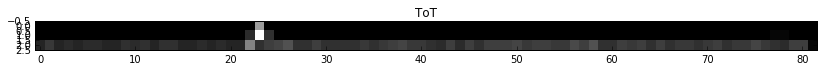

In [116]:
def tot_bits_zrle(cluster_tot):
    bit_sum = 0
    for i, (count, val) in enumerate([(len(list(group)), value) for value, group in groupby(np.ravel(cluster_tot))]):
            bits = 2*7 if val == 0 else count*7
            bit_sum += bits
    return bit_sum

def bit_size_ex_golumb(val):
    x = -val*2 + 1 if val <= 0 else val*2
    bits = int(floor(log(x)/log(2)))
    return bits + bits + 1

def tot_bits_line_prediction(cluster_tot):
    left_max = np.argmax(cluster_tot, axis=0)[0]
    right_max = np.argmax(cluster_tot, axis=0)[-1]
    y0 = left_max
    y1 = right_max
    num = cluster_tot.shape[1]
    x, y = np.linspace(0, cluster_tot.shape[1]-1, num), np.linspace(y0, y1, num)
    mean = cluster_tot[np.round([y,x]).astype(int).tolist()].mean()
    prediction = np.round(make_line_prediction(cluster_tot.shape, y0, y1) * mean)
    
    # Left and right edge and mean
    bit_sum = 7*3
    for i, (count, val) in enumerate([(len(list(group)), value) for value, group in groupby(np.ravel(cluster_tot - prediction))]):
            val_ex_golumnb = bit_size_ex_golumb(val)
            bits = val_ex_golumnb + bit_size_ex_golumb(count) if val == 0 else count*val_ex_golumnb
            #print count, val, '->', bits
            bit_sum += bits
    return bit_sum

def tot_bits_line_prediction_lzw(cluster_tot):
    left_max = np.argmax(cluster_tot, axis=0)[0]
    right_max = np.argmax(cluster_tot, axis=0)[-1]
    y0 = left_max
    y1 = right_max
    num = cluster_tot.shape[1]
    x, y = np.linspace(0, cluster_tot.shape[1]-1, num), np.linspace(y0, y1, num)
    mean = cluster_tot[np.round([y,x]).astype(int).tolist()].mean()
    prediction = np.round(make_line_prediction(cluster_tot.shape, y0, y1) * mean)
    
    seq = (cluster_tot - prediction + 64).ravel().astype(int)
    return len(lzw(seq))*8

def lzw(seq):
    dictionary = dict(((i,), i) for i in xrange(0, 128))
    size = len(dictionary)

    buf = []
    out = []
    
    for i in seq:
        sym = [i]
        if tuple(buf+sym) in dictionary:
            buf = buf+sym
        else:
            out.append(dictionary[tuple(buf)])
            dictionary[tuple(buf+sym)] = size
            size += 1
            buf = sym
    if buf:
        out.append(dictionary[tuple(buf)])
    return out

def lzw_decompress(compressed_seq): 
    dictionary = dict((i, [i]) for i in xrange(0, 128))
    size = len(dictionary)
    
    out = []
    buf = dictionary[compressed_seq.pop(0)]
    out += buf
    for i in compressed_seq:
        if i in dictionary:
            entry = dictionary[i]
        elif i == size:
            entry = buf + [buf[0]]
        else:
            raise ValueError('Bad compressed i: %s' % i)
        out += entry

        dictionary[size] = buf + [entry[0]]
        size += 1
 
        buf = entry
    return out

def tot_bits_lzw(cluster_tot):
    seq = cluster_tot.ravel().astype(int)
    return len(lzw(seq))*8

def tot_bits_row_cluster(cluster_tot):
    bit_sum = 0
    binary_cluster = np.zeros(cluster_tot.shape)
    binary_cluster[np.where(cluster_tot > 0)] = 1
    for i, (count, val) in enumerate([(len(list(group)), value) for value, group in groupby(np.ravel(binary_cluster))]):
            bits = 0 if val == 0 else count*7 + 19
            bit_sum += bits
    return bit_sum

cluster_tots = get_cluster_tots(25, 10)
cluster_tot = cluster_tots[1][1]
show_gray(cluster_tot, 'ToT', vmin=0)

print tot_bits_lzw(cluster_tot)
print tot_bits_line_prediction_lzw(cluster_tot)
print tot_bits_line_prediction(cluster_tot)
print tot_bits_zrle(cluster_tot)
print tot_bits_row_cluster(cluster_tot)

In [ ]:
# TODOs:
# More 'realistic scenarios'
#    1x4 regions - 32bits- compare Huffman and line prediction with bitmask - ask how the Huffman works here
#    2x8 regions - the same thing

# Look at some lossy compression methods and figure out what would be the compression ratio if lossiness was minimized